<a href="https://colab.research.google.com/github/ruiiary/user-research/blob/main/openchat_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 교내 네트워킹 분석을 위한 직무 카카오톡 오픈채팅방 온라인 관찰 개요
1. **raw 데이터 가져오기**
- 데이터 수집 기간 : 2023.02.09. ~ 2024.11.09.
- 채팅방 이름 : (비공개)
- '네트워킹' 종류(관찰 분류를 위함) : 재학생-졸업생 네트워킹 위주(분석 전 가설)
- 방식 : Python과 pandas, matplotlib 라이브러리를 활용한 데이터 분석  
- 데이터 형식 : csv, 채팅방 내 대화 내용 저장 기능을 통해 csv 파일로 저장 <br>
- 채팅방 인원 : (비공개)명 (기간 내 들어온 인원: 169명 / 나간 인원: 167명)

2. **데이터 전처리** <br>
불필요한 메세지("OO님이 들어왔습니다", "OO님이 나갔습니다") 제거

3. **데이터 분석**
- 메세지 워드클라우드 시각화(Okt ver./ Hannanum ver.)
- 월별 메세지 개수
- 유저 중 헤비유저 분석
- 수동 카테고라이징 <br>

4. **문서 작업** <br>
오픈채팅방 관련 설명, 온라인 관찰 진행 배경, 데이터 분석 절차 설명 등

### 1. raw 데이터 가져오기

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df_kakao = pd.read_csv('kakao_raw.csv')

In [3]:
# 데이터 전 처리 전 raw 데이터프레임의 전체 길이 출력
len(df_kakao)

2057

### 2. 데이터 전처리 작업

In [4]:
# "OO님이 들어왔습니다/나갔습니다"는 데이터에서 제외하기

# 문구 개수를 측정하여, 기간 내 들어온 인원과 나간 인원 확인
entrance = df_kakao[df_kakao['Message'].str.contains("님이 들어왔습니다", na=False, case=False)]
print("기간 내 들어온 인원:", len(entrance))

leave = df_kakao[df_kakao['Message'].str.contains("님이 나갔습니다", na=False, case=False)]
print("기간 내 나간 인원:", len(leave))

# df_kakao에서 entrance 메세지, leave 메세지, 방장봇 메세지 제거하기
df_kakao = df_kakao[~df_kakao['Message'].str.contains("님이 들어왔습니다", na=False, case=False)]
df_kakao = df_kakao[~df_kakao['Message'].str.contains("님이 나갔습니다", na=False, case=False)]
df_kakao = df_kakao[~df_kakao['Message'].str.contains("공지사항 확인해주시고 디스코드 많은 관심 부탁드려요!", na=False, case=False)]
df_kakao = df_kakao[~df_kakao['Message'].str.contains("방장봇", na=False, case=False)]


기간 내 들어온 인원: 169
기간 내 나간 인원: 167


In [5]:
print("전처리 후 메세지 개수:", len(df_kakao))

전처리 후 메세지 개수: 1659


In [6]:
df_kakao.to_csv('new_kakao.csv')

### 3. 데이터 분석
- 메세지 워드클라우드 시각화
- 날짜 기간별 메세지 분포도 분석
- 분기별/월별 메세지 개수
- 유저 중 헤비유저 비율 분석
- 수동 카테고라이징

### 3-1. 워드클라우드 빈출 단어 시각화

In [7]:
# 1)메세지 내용 시각화
# 정확성을 높이기 위해 2차 전처리 작업 : "삭제된 메시지입니다."도 제거
delete_msg = df_kakao[df_kakao['Message'].str.contains("삭제된 메시지입니다.", na=False, case=False)]
new_df = df_kakao[~df_kakao['Message'].str.contains("삭제된 메시지입니다.", na=False, case=False)]

print("기간 내 삭제된 메세지의 개수", len(delete_msg))
print(len(new_df))


기간 내 삭제된 메세지의 개수 22
1637


In [ ]:
# 워드클라우드 한글 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [9]:
# 한국어 자연어처리 패키지 다운로드, 단어를 쪼개서 명사만 남김
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 38.2 MB/s eta 0:00:00


In [10]:
# 워드클라우드에서 사용할 라이브러리 import
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt # 위 라이브러리에서 명사를 구분해 주는 함수, txt 파일은 Okt 사용
import numpy as np # 일렬 배열도 만들 거라 Numpy 사용

In [11]:
# 텍스트 분석하기
import pandas as pd
from konlpy.tag import Okt

# 분석하려는 특정 열이 'text'라고 가정
# 모든 텍스트를 하나의 문자열로 결합
text = ' '.join(df_kakao['Message'].astype(str).tolist())

# 텍스트 분석
okt = Okt()
nouns = okt.nouns(text)

words = [n for n in nouns if len(n)>1] # 한 글자짜리 데이터는 버림
c = Counter(words)

print(c, words)

Counter({'혹시': 264, '데이터': 224, '대학원': 168, '관련': 136, '모집': 129, '관심': 128, '생각': 125, '진행': 120, '지원': 118, '확인': 112, '분석': 109, '지능': 104, '인공': 102, '분야': 100, '프로젝트': 96, '인턴': 94, '러닝': 94, '공유': 87, '사항': 87, '면접': 83, '추천': 82, '참여': 82, '경험': 81, '변경': 81, '교수': 78, '석사': 78, '학부': 77, '공지': 76, '연구': 75, '공부': 74, '경우': 73, '활동': 73, '준비': 72, '채용': 71, '학기': 69, '회사': 67, '내용': 67, '닉네임': 65, '질문': 63, '논문': 61, '링크': 59, '공고': 59, '지금': 58, '답변': 57, '스터디': 57, '예정': 56, '강의': 56, '고민': 52, '정말': 52, '카카오': 52, '정도': 50, '모델': 50, '시간': 50, '취업': 49, '행사': 49, '학교': 48, '직무': 48, '전공': 47, '말씀': 47, '사진': 47, '개발': 47, '연락': 46, '다른': 46, '신청': 46, '활용': 46, '파이썬': 45, '도움': 45, '오픈': 45, '과정': 44, '수업': 44, '신입': 44, '컨택': 43, '참고': 43, '마감': 43, '동아리': 43, '정보': 42, '발표': 42, '머신': 41, '기간': 41, '교육': 41, '랩실': 40, '여기': 40, '사용': 40, '저희': 38, '선배': 37, '선택': 37, '기획': 37, '사람': 36, '주제': 36, '채팅': 36, '현재': 36, '통계': 36, '기술': 36, '연구실': 35, '이번': 35, '코드': 35, '통해': 3

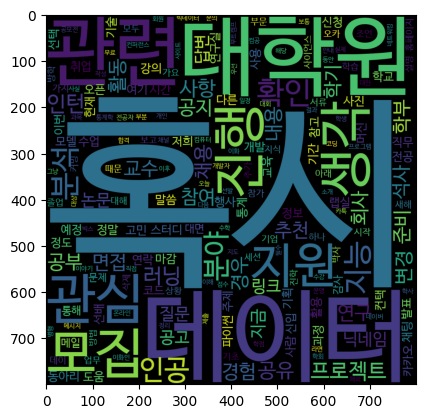

In [12]:
# 워드클라우드 생성하기
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)

plt.figure()
plt.imshow(gen)
wc.to_file('kakao_wc.png')

### 3-1. Hannanum 라이브러리 사용 워드클라우드

In [13]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import networkx as nx
from konlpy.tag import Hannanum

hannanum = Hannanum()

# 파일 열고 분석
import pandas as pd
from konlpy.tag import Hannanum

# 모든 메시지를 하나의 문자열로 결합
text = ' '.join(df_kakao['Message'].astype(str))

# Hannanum으로 분석
hannanum = Hannanum()
nouns = hannanum.nouns(text)

words = [n for n in nouns if len(n)>1] # 한 글자짜리 데이터는 버림
c = Counter(words)

print(words, c)

['대학원', '진학', '선배님', '의견', '산업공학', '인공지능', '연구실', '연구직', '진로', '생각', '어떨지', '고민', 'ㅠㅠ', '이거', 'ㅜㅜ', '관심', '구글', 'scraper이용해서', '스크래핑하려고하는데', '각페이지마다', '10개정도글', '그런페이지', '5개정', '설정', '페이지번호', '선택', '이사이트', '설정', '페이지번호', '선택이', '설정', '선택', '1.', '페이지번호', '문자', '2.', '페이지번호', '링크', '문자', '확인방법', '3.', '이경우', '산공', '인공지능', '연구실', '취업', '대부분', '연구직', '생각', '연구실', '연구실', '졸업생들', '취업', '회사', '기업', '한번', '졸업생', '업계', '특정', '회사들', '거기', '취업', '경우', '거기', '회사', '연구실', '연구실', '홈페이지', '섹션', '확인', '어떠실까요', '졸업생', '동향', '선배님', '안녕', '진로', '못잡', '재학중', '학부벗', '복수전공', '소프트웨어', '공부', '올해', '여름방학', '2학기', '랩실인턴', '방식', '컨택', '궁금', '교수님', '상담', '말꺼내', '자기소개서같은거', '주전공', '인문대생', '친구들', '랩실인턴', '어떤과정', '채용', '정보', '상황', '학점', '진입한지', '얼마', '과목', '컴프실,', '씨프실,', '자료구조', '알고리즘', '이정도고요,,', '(5학년이긴', '합니다만', '이번학기', '객지프,', '파이썬데이터분석,', '인공지능딥러닝,', '텍스트', '마이닝개론,', '융합소프트웨어프로젝트', '사이버보안개론', '이정도', '예정', '이번학기', '여름방학때', '학부인턴', '가능', '어떤걸', '어필', '조언', '학기중', '추천', '독학', '공부', '열정', '괜찮숩니', '학기중', '방학때', '학

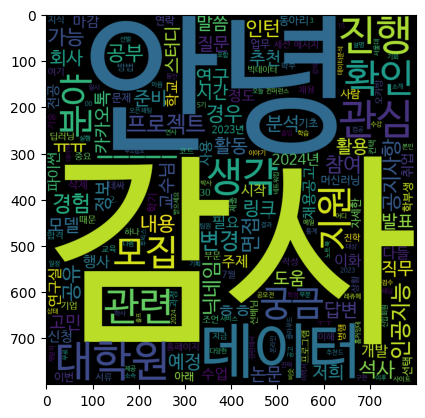

In [14]:
# 워드클라우드 생성하기
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)

plt.figure()
plt.imshow(gen)
wc.to_file('kakao_wc2.png')

#### 주요 대화 주제를 가시적으로 출력하기 위해, 인사 word는 제외
-> 연구 윤리에 벗어나는 건지 확인해볼 것

In [15]:
words = [n for n in nouns if len(n) > 1 and n not in ["안녕", "감사"]]
# 단어 빈도수 계산
c = Counter(words)

print(c, words)

Counter({'데이터': 133, '대학원': 128, '관심': 121, '진행': 115, '생각': 110, '확인': 106, '관련': 105, '지원': 88, '모집': 86, '_____': 86, '궁금': 83, '분야': 82, '프로젝트': 80, '변경': 80, '인공지능': 76, '경험': 73, '경우': 69, '석사': 69, '공지사항': 69, '가능': 67, '공부': 66, '공유': 66, '참여': 66, '면접': 65, '닉네임': 65, '인턴': 62, '내용': 61, '분석': 58, 'ㅠㅠ': 56, '링크': 56, 'ㅎㅎ': 56, '활동': 56, '회사': 54, '준비': 54, '답변': 53, '예정': 51, '연구': 50, '논문': 46, '스터디': 46, '카카오톡': 45, '교수님': 44, '추천': 44, '고민': 43, '모델': 43, '직무': 43, '질문': 42, '시간': 41, '활용': 41, '정보': 40, '저희': 40, '발표': 40, '말씀': 39, '도움': 39, '2024년': 39, '다들': 38, '이화': 38, '채용공고': 38, '수업': 37, '파이썬': 36, '주제': 36, '정도': 36, '행사': 36, '마감': 36, '개발': 35, '필요': 34, '연구실': 33, '학교': 32, '신청': 32, '시작': 32, '사용': 32, '취업': 31, '전공': 31, '머신러닝': 31, '사람': 31, '동아리': 31, '이번': 30, '아래': 30, '선택': 29, '문제': 29, '기초': 29, '삭제': 28, '연락': 28, '업무': 28, '학기': 28, '자세한': 27, '학부생': 27, '2023년': 27, '홈페이지': 26, '상황': 26, '조언': 26, '방법': 26, '오카방': 26, '세션': 26, '딥러닝': 26, '7월': 26,

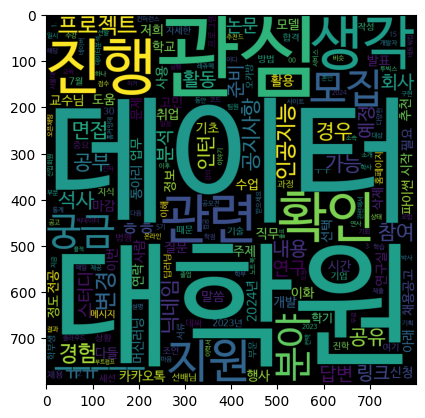

In [16]:
# 워드클라우드 생성하기
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)

plt.figure()
plt.imshow(gen)
wc.to_file('kakao_wc3.png')

### 3-2. 날짜 기간별 메세지 분포도 분석

In [18]:
# Date 열에서 날짜 부분만 남기기
new_df['Date'] = pd.to_datetime(new_df['Date']).dt.date

# Date 열을 월 단위로 변환
new_df['Date'] = pd.to_datetime(new_df['Date']).dt.to_period('M')

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

In [ ]:
new_df[900:1000]

Date
2023-02    192
2023-03    207
2023-04    183
2023-05     59
2023-06    175
2023-07     94
2023-11     48
2023-12     96
2024-01    116
2024-02     34
2024-03    120
2024-04    127
2024-05     30
2024-06     35
2024-07     49
2024-08     29
2024-09     16
2024-10     19
2024-11      8
Freq: M, Name: count, dtype: int64


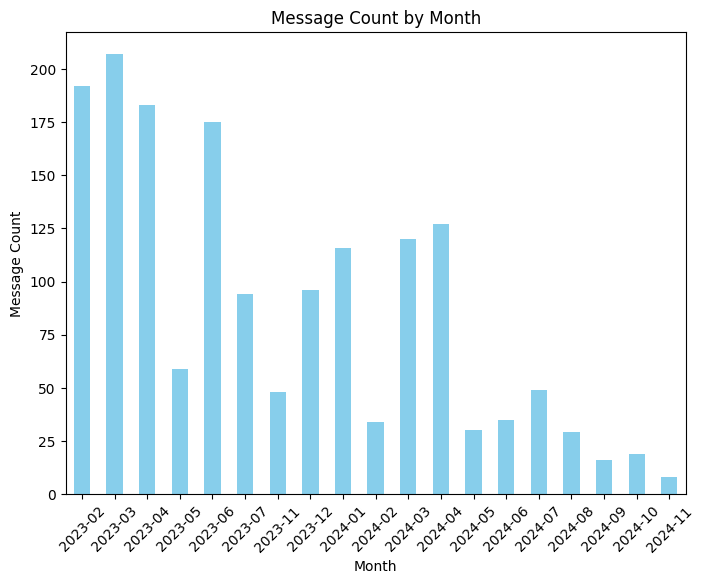

In [ ]:
# 월별 메시지 수 계산 및 정렬
monthly_counts = new_df['Date'].value_counts().sort_index()
print(monthly_counts)

# 그래프 그리기
plt.figure(figsize=(8, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title("Message Count by Month")
plt.xlabel("Month")
plt.ylabel("Message Count")
plt.xticks(rotation=45)
plt.show()

### 3-3. 유저별 메세지 수 분석

In [ ]:
# 'User' 별로 메시지 개수 세기
user_message_counts = new_df.groupby('User').size()

# 내림차순으로 정렬
user_message_counts = user_message_counts.sort_values(ascending=False)

# 'User'와 메시지 개수를 하나의 데이터프레임으로 변환
user_message_counts_df = user_message_counts.reset_index(name='Message Count')

# 결과 출력
#user_message_counts_df

In [ ]:
# 'Message Count' 별로 유저 수 계산
message_count_user = user_message_counts_df.groupby('Message Count').size().reset_index(name='User Count')

# 결과 출력
message_count_user

new_row = pd.DataFrame({'Message Count': [0], 'User Count': [441]})

# 기존 데이터프레임에 새로운 행 추가
message_count_user = pd.concat([message_count_user, new_row], ignore_index=True)

message_count_user

,Message Count,User Count
0,1,75
1,2,36
2,3,28
3,4,27
4,5,16
5,6,14
6,7,10
7,8,10
8,9,12
9,10,4


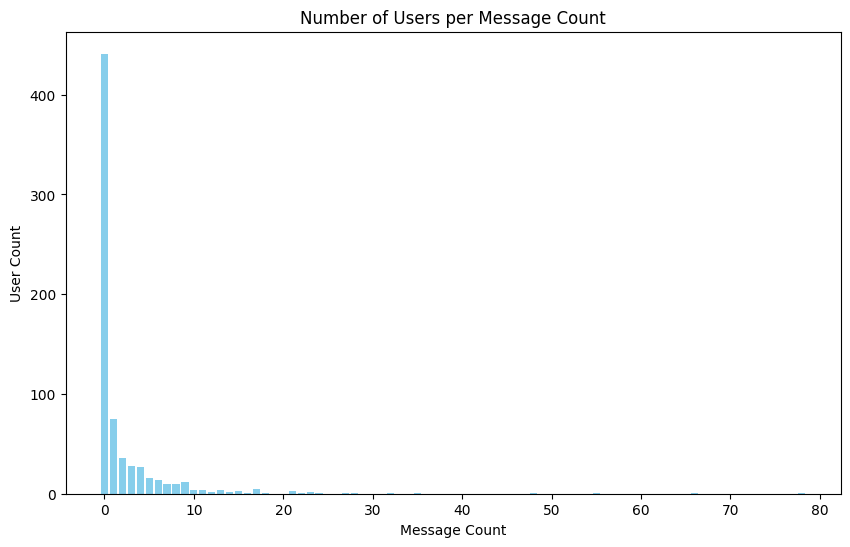

In [ ]:
import matplotlib.pyplot as plt

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(message_count_user['Message Count'], message_count_user['User Count'], color='skyblue')

# 그래프 제목과 레이블 설정
plt.title('Number of Users per Message Count')
plt.xlabel('Message Count')
plt.ylabel('User Count')

# 그래프 출력
plt.show()

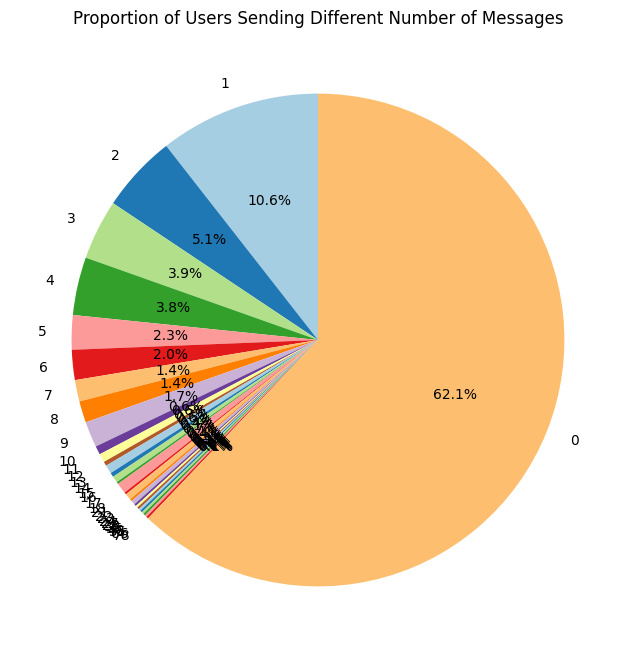

In [ ]:
import matplotlib.pyplot as plt

# 전체 유저 수
total_users = new_df['User'].nunique()

# 각 메시지 수를 보낸 유저 수 비율 계산
message_count_user['User Count Ratio'] = message_count_user['User Count'] / total_users

# 원형 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(message_count_user['User Count Ratio'], labels=message_count_user['Message Count'],
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# 그래프 제목 설정
plt.title('Proportion of Users Sending Different Number of Messages')

# 그래프 출력
plt.show()